In [51]:
import pandas as pd
import cv2
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [25]:
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.get_logger().setLevel('INFO')

Num GPUs Available:  1


In [54]:
df = pd.read_csv('archive/metadata.csv')
df.head()

,Unnamed: 0,image,class,format,mode,shape
0,0,Cancer (1).jpg,tumor,JPEG,RGB,"(512, 512, 3)"
1,1,Cancer (1).png,tumor,PNG,L,"(300, 240)"
2,2,Cancer (1).tif,tumor,TIFF,RGB,"(256, 256, 3)"
3,3,Cancer (10).jpg,tumor,JPEG,RGB,"(512, 512, 3)"
4,4,Cancer (10).tif,tumor,TIFF,RGB,"(256, 256, 3)"


In [27]:
df.shape

(4600, 6)

In [28]:
df["shape"].value_counts()

(512, 512, 3)    884
(225, 225, 3)    364
(630, 630, 3)    126
(256, 256, 3)    105
(236, 236, 3)     89
                ... 
(201, 236, 3)      1
(222, 233, 3)      1
(294, 236, 3)      1
(244, 235, 3)      1
(454, 442, 4)      1
Name: shape, Length: 475, dtype: int64

In [29]:
df["class"].value_counts()

tumor     2513
normal    2087
Name: class, dtype: int64

In [30]:
df["mode"].unique()

array(['RGB', 'L', 'RGBA', 'P'], dtype=object)

In [31]:
df[df["mode"]=="P"]

,Unnamed: 0,image,class,format,mode,shape
4129,4129,Not Cancer (576).jpg,normal,PNG,P,"(725, 728)"
4581,4581,Not Cancer (982).jpg,normal,PNG,P,"(725, 728)"


In [32]:
df[df["mode"]=="L"]

,Unnamed: 0,image,class,format,mode,shape
1,1,Cancer (1).png,tumor,PNG,L,"(300, 240)"
36,36,Cancer (1028).jpg,tumor,JPEG,L,"(336, 300)"
239,239,Cancer (1209).jpg,tumor,JPEG,L,"(336, 300)"
269,269,Cancer (1236).jpg,tumor,JPEG,L,"(1024, 1024)"
293,293,Cancer (1258).jpg,tumor,JPEG,L,"(1427, 1275)"
...,...,...,...,...,...,...
4561,4561,Not Cancer (964).jpg,normal,JPEG,L,"(225, 225)"
4566,4566,Not Cancer (969).jpg,normal,JPEG,L,"(1024, 1024)"
4571,4571,Not Cancer (973).jpg,normal,JPEG,L,"(275, 220)"
4577,4577,Not Cancer (979).jpg,normal,JPEG,L,"(301, 275)"


In [33]:
df["image"][0]

'Cancer (1).jpg'

In [59]:
def preprocessing(img):
    img = cv2.normalize(img, None, 0, 255, norm_type=cv2.NORM_MINMAX)
    #img = cv2.adaptiveThreshold(img, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
    #img = cv2.equalizeHist(img)
    return img


def tt_split(df):
    for tipo in ["train", "test"]:
        for clase in ["normal", "tumor"]:
            path = 'archive/'+tipo+"/"+clase+"/"
            for f in os.listdir(path):
                os.remove(os.path.join(path, f))
                
    X_train, X_test, Y_train, Y_test = train_test_split(df["image"], df["class"], test_size = 0.3, stratify=df["class"])
    
    for i in range(len(X_train)):
        if Y_train.iloc[i] == "tumor":
            path = "Brain Tumor/"
        elif Y_train.iloc[i] == "normal":
            path = "Healthy/"
        img = cv2.imread("archive/Brain Tumor Data Set/Brain Tumor Data Set/"+path+X_train.iloc[i], 0)
        img = preprocessing(img)
        cv2.imwrite("archive/normalize1/"+X_train.iloc[i], img)
        cv2.imwrite("archive/train/"+Y_train.iloc[i]+"/"+X_train.iloc[i], img)
        
    for i in range(len(X_test)):
        if Y_test.iloc[i] == "tumor":
            path = "Brain Tumor/"
        elif Y_test.iloc[i] == "normal":
            path = "Healthy/"
        img = cv2.imread("archive/Brain Tumor Data Set/Brain Tumor Data Set/"+path+X_test.iloc[i], 0)
        img = preprocessing(img)
        cv2.imwrite("archive/normalize1/"+X_test.iloc[i], img)
        cv2.imwrite("archive/test/"+Y_test.iloc[i]+"/"+X_test.iloc[i], img)
    
    return X_train, X_test, Y_train, Y_test

In [60]:
X_train, X_test, Y_train, Y_test = tt_split(df)

# Normalize

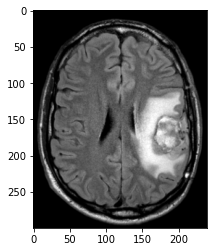

In [45]:
imagen, eq = preprocessing("Cancer (1).png", "tumor")
plt.imshow(imagen, cmap="gray")

# Equalization

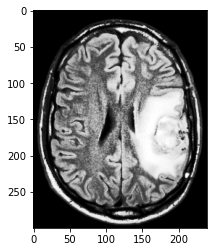

In [46]:
plt.imshow(eq, cmap="gray")

# Umbralization

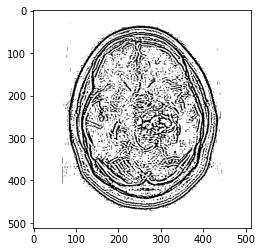

In [41]:
plt.imshow(th, cmap="gray")

# Model

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 252, 252, 36)      2736      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 50, 50, 36)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 48, 48, 18)        5850      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 16, 16, 18)       0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 4608)              0         
                                                                 
 dense_31 (Dense)            (None, 128)             

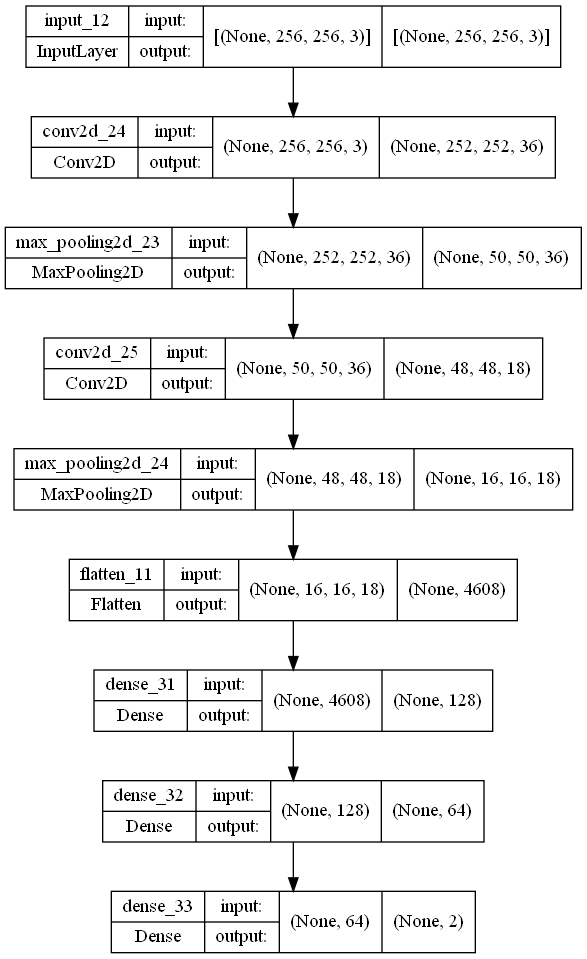

In [89]:
model1 = tf.keras.models.Sequential()
# Input
model1.add(tf.keras.layers.Input(shape=(256, 256, 3)))

# Conv
model1.add(tf.keras.layers.Conv2D(filters=36, kernel_size=5, activation="relu"))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(5,5)))


model1.add(tf.keras.layers.Conv2D(filters=18, kernel_size=3, activation="relu"))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))

# Flatten
model1.add(tf.keras.layers.Flatten())

# Clasificador
model1.add(tf.keras.layers.Dense(128, activation='relu'))
model1.add(tf.keras.layers.Dense(64, activation='sigmoid'))
model1.add(tf.keras.layers.Dense(2, activation='softmax'))

model1.compile(loss="binary_crossentropy", optimizer=tf.optimizers.Adam(learning_rate=1e-3), metrics=["accuracy"])
model1.summary()
tf.keras.utils.plot_model(model1,show_shapes=True)

In [61]:
# Definimos las transformaciones para el conjunto de train
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                rotation_range=40,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                shear_range=0.2,
                                                                zoom_range=0.2,
                                                                horizontal_flip=True,
                                                                fill_mode='constant')

# Definimos las transformaciones para el conjunto de test
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [62]:
train_dir = "archive/train/"
test_dir = "archive/test/"

In [65]:
# Especificamos el tamaño del batch, número de imagenes que genera en cada iteración 
batch_size = 128

# Obtenemos un generador que realiza las transformaciones y carga
# las imágenes de entrenamiento
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(256, 256),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

# Obtenemos un generador que realiza las transformaciones y carga
# las imágenes de validación
validation_generator = val_datagen.flow_from_directory(test_dir,
                                                       target_size=(256, 256),
                                                       batch_size=batch_size,
                                                       class_mode='categorical')

Found 3220 images belonging to 2 classes.
Found 1380 images belonging to 2 classes.


In [90]:
# entrenamos el modelo
history = model1.fit(train_generator,
                     steps_per_epoch=train_generator.n//batch_size,  
                     epochs=40,
                     validation_data=validation_generator,
                     validation_steps=validation_generator.n//batch_size,  
                     verbose=1)

Epoch 1/40
25/25 [==============================] - 53s 2s/step - loss: 0.6850 - accuracy: 0.5501 - val_loss: 0.6607 - val_accuracy: 0.6031
Epoch 2/40
25/25 [==============================] - 51s 2s/step - loss: 0.6576 - accuracy: 0.6041 - val_loss: 0.6221 - val_accuracy: 0.6812
Epoch 3/40
25/25 [==============================] - 50s 2s/step - loss: 0.6432 - accuracy: 0.6378 - val_loss: 0.6052 - val_accuracy: 0.6625
Epoch 4/40
25/25 [==============================] - 51s 2s/step - loss: 0.6164 - accuracy: 0.6578 - val_loss: 0.5404 - val_accuracy: 0.7477
Epoch 5/40
25/25 [==============================] - 51s 2s/step - loss: 0.6053 - accuracy: 0.6656 - val_loss: 0.5435 - val_accuracy: 0.7188
Epoch 6/40
25/25 [==============================] - 51s 2s/step - loss: 0.5987 - accuracy: 0.6853 - val_loss: 0.6159 - val_accuracy: 0.6594
Epoch 7/40
25/25 [==============================] - 51s 2s/step - loss: 0.5842 - accuracy: 0.6921 - val_loss: 0.5527 - val_accuracy: 0.7219
Epoch 8/40
25/25 [==

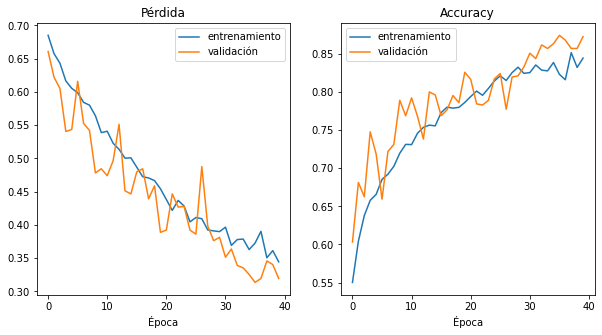

In [91]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(history.history["loss"], label="entrenamiento")
plt.plot(history.history["val_loss"], label="validación")
plt.title("Pérdida"); plt.xlabel("Época"); plt.legend()
plt.subplot(122)
plt.plot(history.history["accuracy"], label="entrenamiento")
plt.plot(history.history["val_accuracy"], label="validación")
plt.title("Accuracy"); plt.xlabel("Época"); plt.legend()

In [97]:
print("Evaluate on validation data")
results = model1.evaluate(validation_generator, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
11/11 [==============================] - 4s 304ms/step - loss: 0.3211 - accuracy: 0.8710
test loss, test acc: [0.3211345970630646, 0.8710144758224487]


In [109]:
from sklearn.metrics import classification_report
Y_pred = model1.predict(validation_generator)
print(classification_report(validation_generator.classes, np.argmax(Y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.47      0.42      0.44       626
           1       0.56      0.61      0.58       754

    accuracy                           0.52      1380
   macro avg       0.51      0.51      0.51      1380
weighted avg       0.52      0.52      0.52      1380



In [96]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(validation_generator.classes, np.argmax(Y_pred, axis=1)))

[[267 359]
 [289 465]]


In [110]:
model1.save("modelo 3.h5")